<a href="https://colab.research.google.com/github/Joabe18/varejista-de-bicicletas/blob/main/agrupamento_pi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas e datasets

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df_amostra = pd.read_csv('/content/drive/MyDrive/tabelasDrive/amostra_fato_ml_eua_5t.csv')
customer = pd.read_csv('/content/drive/MyDrive/tabelasDrive/dimcustumer.csv')
product = pd.read_csv('/content/drive/MyDrive/tabelasDrive/dimproduct.csv')
specialoffer = pd.read_csv('/content/drive/MyDrive/tabelasDrive/dimspecialoffer.csv')
territory = pd.read_csv('/content/drive/MyDrive/tabelasDrive/dimterritory.csv')
plt.style.use('fivethirtyeight')

In [ ]:
df_amostra['territory_name'].value_counts()

EUA               10953
Canada             3533
Australia          1445
United Kingdom      983
France              866
Germany             710
Name: territory_name, dtype: int64

# Pré Processamento

## Retirando  colunas que não serão utilizadas

In [ ]:
print(type(df_amostra))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_amostra.head()

,sales_order_id,product_id,product_name,custumer_id,customer_marital_status,customer_gender,territory_id,territory_name,special_offer_id,special_offer_type,...,due_date,ship_date,status,delivery_days,subtotal,order_qty,unit_price,unit_price_discount,stratum,row_num
0,16632046,798,"Road-550-W Yellow, 40",286,S,F,9,Australia,1,No Discount,...,2014-02-04,2014-01-30,entregue no prazo,7,764.28,1,742.35,0.0,1,1
1,14500942,786,"Mountain-300 Black, 40",286,S,F,9,Australia,1,No Discount,...,2013-07-25,2013-07-20,entregue no prazo,7,66.97,1,3.99,0.0,1,2
2,34884712,901,"LL Touring Frame - Yellow, 54",286,S,F,9,Australia,1,No Discount,...,2013-11-08,2013-11-03,entregue no prazo,7,1237.82,1,4.99,0.0,1,3
3,13589640,781,"Mountain-200 Silver, 46",286,S,F,9,Australia,1,No Discount,...,2013-11-18,2013-11-13,entregue no prazo,7,588.96,1,8.99,0.0,1,4
4,15568330,792,"Road-250 Red, 58",286,S,F,9,Australia,1,No Discount,...,2013-07-22,2013-07-17,entregue no prazo,7,69.97,1,4.99,0.0,1,5


In [ ]:
df_amostra = df_amostra.drop(['sales_order_id', 'product_id', 'custumer_id','territory_id','special_offer_id','sales_order_ak','order_date','due_date','ship_date', 'stratum', 'row_num'], axis=1)

In [ ]:
df_amostra.head()

,product_name,customer_marital_status,customer_gender,territory_name,special_offer_type,special_offer_category,status,delivery_days,subtotal,order_qty,unit_price,unit_price_discount
0,"Road-550-W Yellow, 40",S,F,Australia,No Discount,No Discount,entregue no prazo,7,764.28,1,742.35,0.0
1,"Mountain-300 Black, 40",S,F,Australia,No Discount,No Discount,entregue no prazo,7,66.97,1,3.99,0.0
2,"LL Touring Frame - Yellow, 54",S,F,Australia,No Discount,No Discount,entregue no prazo,7,1237.82,1,4.99,0.0
3,"Mountain-200 Silver, 46",S,F,Australia,No Discount,No Discount,entregue no prazo,7,588.96,1,8.99,0.0
4,"Road-250 Red, 58",S,F,Australia,No Discount,No Discount,entregue no prazo,7,69.97,1,4.99,0.0


In [ ]:
df_amostra.dtypes

product_name                object
customer_marital_status     object
customer_gender             object
territory_name              object
special_offer_type          object
special_offer_category      object
status                      object
delivery_days                int64
subtotal                   float64
order_qty                    int64
unit_price                 float64
unit_price_discount        float64
dtype: object

In [ ]:
print(type(df_amostra))

<class 'pandas.core.frame.DataFrame'>


## Transformando variáveis categóricas em numéricas

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_amostra2 = df_amostra.iloc[:, 0:12].values
df_amostra2

array([['Road-550-W Yellow, 40', 'S', 'F', ..., 1, 742.35, 0.0],
       ['Mountain-300 Black, 40', 'S', 'F', ..., 1, 3.99, 0.0],
       ['LL Touring Frame - Yellow, 54', 'S', 'F', ..., 1, 4.99, 0.0],
       ...,
       ['ML Mountain Frame-W - Silver, 42', 'M', 'F', ..., 3, 809.76,
        0.0],
       ['Road-450 Red, 60', 'M', 'F', ..., 5, 48.59, 0.0],
       ['Road-750 Black, 58', 'M', 'F', ..., 1, 4.99, 0.0]], dtype=object)

In [ ]:
encoders = {}

for i in range(7):
    le = LabelEncoder()
    df_amostra2[:,i] = le.fit_transform(df_amostra2[:,i])
    encoders[i] = le

In [ ]:
#df_amostra2[:,0] = LabelEncoder().fit_transform(df_amostra2[:,0])
#df_amostra2[:,1] = LabelEncoder().fit_transform(df_amostra2[:,1])
#df_amostra2[:,2] = LabelEncoder().fit_transform(df_amostra2[:,2])
#df_amostra2[:,3] = LabelEncoder().fit_transform(df_amostra2[:,3])
#df_amostra2[:,4] = LabelEncoder().fit_transform(df_amostra2[:,4])
#df_amostra2[:,5] = LabelEncoder().fit_transform(df_amostra2[:,5])
#df_amostra2[:,6] = LabelEncoder().fit_transform(df_amostra2[:,6])

In [ ]:
df_amostra2

array([[232, 1, 0, ..., 1, 742.35, 0.0],
       [185, 1, 0, ..., 1, 3.99, 0.0],
       [113, 1, 0, ..., 1, 4.99, 0.0],
       ...,
       [132, 0, 0, ..., 3, 809.76, 0.0],
       [230, 0, 0, ..., 5, 48.59, 0.0],
       [251, 0, 0, ..., 1, 4.99, 0.0]], dtype=object)

## Escalonamento

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
escala = StandardScaler()
df_amostra2_esc = escala.fit_transform(df_amostra2)

In [ ]:
df_amostra2_esc

array([[ 0.98788784,  1.25222025, -1.20011658, ..., -0.54549732,
         0.42500356, -0.06002713],
       [ 0.43962276,  1.25222025, -1.20011658, ..., -0.54549732,
        -0.57121909, -0.06002713],
       [-0.40027269,  1.25222025, -1.20011658, ..., -0.54549732,
        -0.56986986, -0.06002713],
       ...,
       [-0.17863361, -0.79858156, -1.20011658, ...,  0.40792412,
         0.51595563, -0.06002713],
       [ 0.96455741, -0.79858156, -1.20011658, ...,  1.36134556,
        -0.51104312, -0.06002713],
       [ 1.20952692, -0.79858156, -1.20011658, ..., -0.54549732,
        -0.56986986, -0.06002713]])

# K-Means

In [ ]:
df_amostra2

array([[232, 1, 0, ..., 1, 742.35, 0.0],
       [185, 1, 0, ..., 1, 3.99, 0.0],
       [113, 1, 0, ..., 1, 4.99, 0.0],
       ...,
       [132, 0, 0, ..., 3, 809.76, 0.0],
       [230, 0, 0, ..., 5, 48.59, 0.0],
       [251, 0, 0, ..., 1, 4.99, 0.0]], dtype=object)

In [ ]:

df = pd.DataFrame(df_amostra2)

In [ ]:
# Matrriz de recursos
dados = df_amostra2[:, [8]] #,3

In [ ]:
dados

array([[764.28],
       [66.97],
       [1237.82],
       ...,
       [33623.78],
       [79589.62],
       [39.98]], dtype=object)

In [ ]:
# from sklearn.cluster import SpectralClustering, AgglomerativeClustering
# from sklearn.preprocessing import StandardScaler

## Elbow Method

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,12):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
  kmeans.fit(dados)
  #inertia: Método para gerar o wcss
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

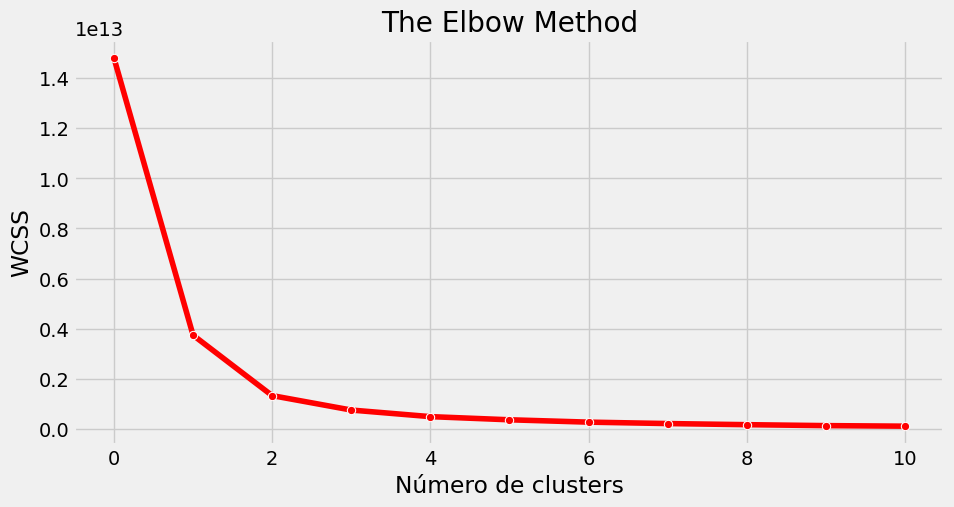

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5, max_iter = 300)

In [ ]:
kmeans1 = kmeans.fit(dados)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[39396.03162039],
       [ 1998.07232233],
       [85167.17322126]])

In [ ]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([1, 1, 1, ..., 0, 2, 1], dtype=int32)

In [ ]:
centroides

array([[39396.03162039],
       [ 1998.07232233],
       [85167.17322126]])

In [ ]:
graf1 = px.scatter( y = dados[:,0], color = classificacao) #x = dados[:,1],
graf2 = px.scatter( y = centroides[:,0], size = [15,15,15]) #x = centroides[:,1],
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width = 800, height = 500, title_text = 'Segmentation K-Means')
graf3.update_xaxes(title = 'Sample quantity')
graf3.update_yaxes(title = 'Subtotal')
graf3.show()

In [ ]:
# df_amostra['cluster'] = classificacao

# sns.barplot(x='territory_name', y='subtotal', hue='cluster', data=df_amostra, errorbar=None)
# plt.xticks(rotation=45)
# plt.title('Subtotal Broken Down By Country')
# plt.xlabel('Territory Name')
# plt.ylabel('Subtotal')
# plt.show()

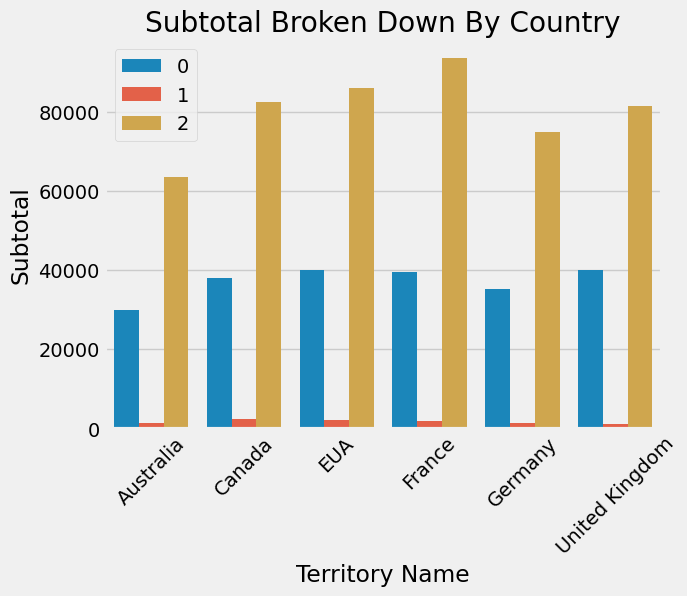

In [ ]:
df_amostra['cluster'] = classificacao

sns.barplot(x='territory_name', y='subtotal', hue='cluster', data=df_amostra, errorbar=None)
plt.xticks(rotation=45)
plt.title('Subtotal Broken Down By Country')
plt.xlabel('Territory Name')
plt.ylabel('Subtotal')
plt.legend(loc='upper left')
plt.show()


In [ ]:
dados[3,:]

array([588.96], dtype=object)

In [ ]:
classificacao[3]

1

In [ ]:
# Cria uma coluna para cada grupo
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,1
1,1
2,1
3,1
4,1
...,...
18485,1
18486,0
18487,0
18488,2


In [ ]:
# Juntando a coluna grupo com o dataframe
df_amostra3 = pd.concat([df_amostra, agrupamento], axis = 1)
df_amostra3

,product_name,customer_marital_status,customer_gender,territory_name,special_offer_type,special_offer_category,status,delivery_days,subtotal,order_qty,unit_price,unit_price_discount,cluster,Grupo
0,"Road-550-W Yellow, 40",S,F,Australia,No Discount,No Discount,entregue no prazo,7,764.28,1,742.35,0.0,1,1
1,"Mountain-300 Black, 40",S,F,Australia,No Discount,No Discount,entregue no prazo,7,66.97,1,3.99,0.0,1,1
2,"LL Touring Frame - Yellow, 54",S,F,Australia,No Discount,No Discount,entregue no prazo,7,1237.82,1,4.99,0.0,1,1
3,"Mountain-200 Silver, 46",S,F,Australia,No Discount,No Discount,entregue no prazo,7,588.96,1,8.99,0.0,1,1
4,"Road-250 Red, 58",S,F,Australia,No Discount,No Discount,entregue no prazo,7,69.97,1,4.99,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18485,"Road-450 Red, 44",M,F,EUA,No Discount,No Discount,entregue no prazo,7,5255.31,9,28.84,0.0,1,1
18486,"Women's Mountain Shorts, L",M,M,EUA,No Discount,No Discount,entregue no prazo,7,37284.74,4,44.99,0.0,0,0
18487,"ML Mountain Frame-W - Silver, 42",M,F,EUA,No Discount,No Discount,entregue no prazo,7,33623.78,3,809.76,0.0,0,0
18488,"Road-450 Red, 60",M,F,United Kingdom,No Discount,No Discount,entregue no prazo,7,79589.62,5,48.59,0.0,2,2


In [ ]:
# Localiza todas as colunas da linha escolhida
df_amostra3.iloc[30,:]

product_name               LL Bottom Bracket
customer_marital_status                    S
customer_gender                            F
territory_name                     Australia
special_offer_type               No Discount
special_offer_category           No Discount
status                     entregue no prazo
delivery_days                              7
subtotal                              574.98
order_qty                                  1
unit_price                            539.99
unit_price_discount                      0.0
cluster                                    1
Grupo                                      1
Name: 30, dtype: object

In [ ]:
# Localiza todos os clientes com subtotal igual 8.99
df_amostra3.loc[df_amostra3.subtotal == 8.99]

,product_name,customer_marital_status,customer_gender,territory_name,special_offer_type,special_offer_category,status,delivery_days,subtotal,order_qty,unit_price,unit_price_discount,cluster,Grupo
178,"Road-450 Red, 52",S,F,Australia,No Discount,No Discount,entregue no prazo,7,8.99,1,8.99,0.0,1,1
500,Touring Tire,S,F,Australia,No Discount,No Discount,entregue no prazo,7,8.99,1,8.99,0.0,1,1
519,Chain,S,F,Australia,No Discount,No Discount,entregue no prazo,7,8.99,1,8.99,0.0,1,1
526,"Mountain-200 Black, 42",S,F,Australia,No Discount,No Discount,entregue no prazo,7,8.99,1,8.99,0.0,1,1
835,"Mountain-300 Black, 44",S,F,Australia,No Discount,No Discount,entregue no prazo,7,8.99,1,8.99,0.0,1,1
864,"Full-Finger Gloves, M",S,F,Australia,No Discount,No Discount,entregue no prazo,7,8.99,1,8.99,0.0,1,1
2099,Minipump,M,M,Canada,No Discount,No Discount,entregue no prazo,7,8.99,1,8.99,0.0,1,1
2783,"LL Mountain Frame - Black, 42",M,M,Canada,No Discount,No Discount,entregue no prazo,7,8.99,1,8.99,0.0,1,1
4320,"Mountain-500 Black, 48",M,M,Canada,No Discount,No Discount,entregue no prazo,7,8.99,1,8.99,0.0,1,1
5624,Taillights - Battery-Powered,S,F,Germany,No Discount,No Discount,entregue no prazo,7,8.99,1,8.99,0.0,1,1


In [ ]:
grupo0 = df_amostra3.loc[df_amostra3.Grupo == 0]
grupo0

,product_name,customer_marital_status,customer_gender,territory_name,special_offer_type,special_offer_category,status,delivery_days,subtotal,order_qty,unit_price,unit_price_discount,cluster,Grupo
10,"HL Touring Frame - Yellow, 60",M,M,Canada,No Discount,No Discount,entregue no prazo,7,26816.58,2,323.99,0.0,0,0
24,"HL Touring Frame - Blue, 46",M,M,Canada,No Discount,No Discount,entregue no prazo,7,39283.27,3,14.13,0.0,0,0
29,"ML Mountain Frame-W - Silver, 42",M,M,Canada,No Discount,No Discount,entregue no prazo,7,28038.64,5,48.59,0.0,0,0
31,"Racing Socks, L",S,F,Australia,No Discount,No Discount,entregue no prazo,7,40106.82,3,1391.99,0.0,0,0
46,"Mountain-400-W Silver, 42",S,F,Australia,No Discount,No Discount,entregue no prazo,7,49053.46,3,445.41,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18478,"Mountain-100 Black, 42",M,F,EUA,No Discount,No Discount,entregue no prazo,7,47871.22,8,20.19,0.0,0,0
18480,"LL Touring Frame - Blue, 62",M,M,EUA,No Discount,No Discount,entregue no prazo,7,61709.28,2,469.79,0.0,0,0
18483,Mountain Bottle Cage,M,F,United Kingdom,No Discount,No Discount,entregue no prazo,7,55790.58,2,323.99,0.0,0,0
18486,"Women's Mountain Shorts, L",M,M,EUA,No Discount,No Discount,entregue no prazo,7,37284.74,4,44.99,0.0,0,0


In [ ]:
grupo1 = df_amostra3.loc[df_amostra3.Grupo == 1]
grupo1

,product_name,customer_marital_status,customer_gender,territory_name,special_offer_type,special_offer_category,status,delivery_days,subtotal,order_qty,unit_price,unit_price_discount,cluster,Grupo
0,"Road-550-W Yellow, 40",S,F,Australia,No Discount,No Discount,entregue no prazo,7,764.28,1,742.35,0.0,1,1
1,"Mountain-300 Black, 40",S,F,Australia,No Discount,No Discount,entregue no prazo,7,66.97,1,3.99,0.0,1,1
2,"LL Touring Frame - Yellow, 54",S,F,Australia,No Discount,No Discount,entregue no prazo,7,1237.82,1,4.99,0.0,1,1
3,"Mountain-200 Silver, 46",S,F,Australia,No Discount,No Discount,entregue no prazo,7,588.96,1,8.99,0.0,1,1
4,"Road-250 Red, 58",S,F,Australia,No Discount,No Discount,entregue no prazo,7,69.97,1,4.99,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18481,"Racing Socks, L",M,F,United Kingdom,No Discount,No Discount,entregue no prazo,7,1243.84,1,28.99,0.0,1,1
18482,Bike Wash - Dissolver,M,M,EUA,No Discount,No Discount,entregue no prazo,7,49.97,1,4.99,0.0,1,1
18484,Road Bottle Cage,M,F,EUA,No Discount,No Discount,entregue no prazo,7,42.28,1,35.00,0.0,1,1
18485,"Road-450 Red, 44",M,F,EUA,No Discount,No Discount,entregue no prazo,7,5255.31,9,28.84,0.0,1,1


In [ ]:
grupo2 = df_amostra3.loc[df_amostra3.Grupo == 2]
grupo2

,product_name,customer_marital_status,customer_gender,territory_name,special_offer_type,special_offer_category,status,delivery_days,subtotal,order_qty,unit_price,unit_price_discount,cluster,Grupo
25,"Women's Mountain Shorts, S",M,M,Canada,No Discount,No Discount,entregue no prazo,7,81230.94,2,26.72,0.0,2,2
120,"LL Touring Frame - Blue, 50",M,M,Canada,No Discount,No Discount,entregue no prazo,7,68880.08,1,356.90,0.0,2,2
135,LL Touring Seat/Saddle,M,M,Canada,No Discount,No Discount,entregue no prazo,7,64654.28,3,149.87,0.0,2,2
140,"Women's Mountain Shorts, M",M,M,Canada,No Discount,No Discount,entregue no prazo,7,77253.42,8,26.72,0.0,2,2
146,"Men's Bib-Shorts, M",M,M,Canada,No Discount,No Discount,entregue no prazo,7,95434.91,2,1308.94,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,"LL Road Frame - Red, 58",M,M,EUA,No Discount,No Discount,entregue no prazo,7,160378.39,10,14.69,0.0,2,2
18399,"Mountain-500 Black, 52",M,F,United Kingdom,No Discount,No Discount,entregue no prazo,7,89869.28,1,200.05,0.0,2,2
18420,"Long-Sleeve Logo Jersey, M",M,M,EUA,No Discount,No Discount,entregue no prazo,7,74719.78,2,5.19,0.0,2,2
18471,"Road-350-W Yellow, 42",M,F,United Kingdom,No Discount,No Discount,entregue no prazo,7,70336.86,1,31.58,0.0,2,2


# Testes


## Fotos dos teste de agrupamentos





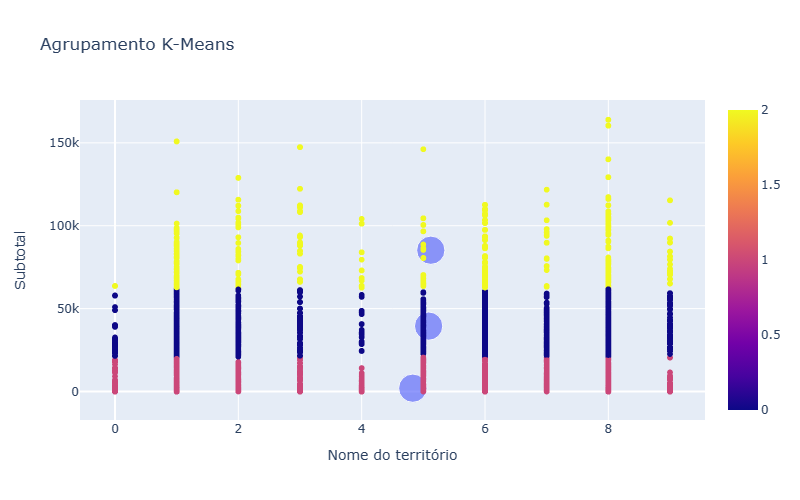

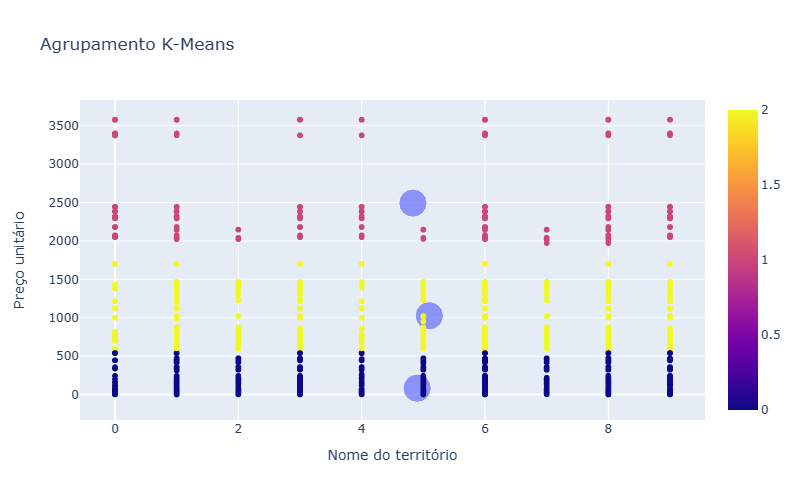

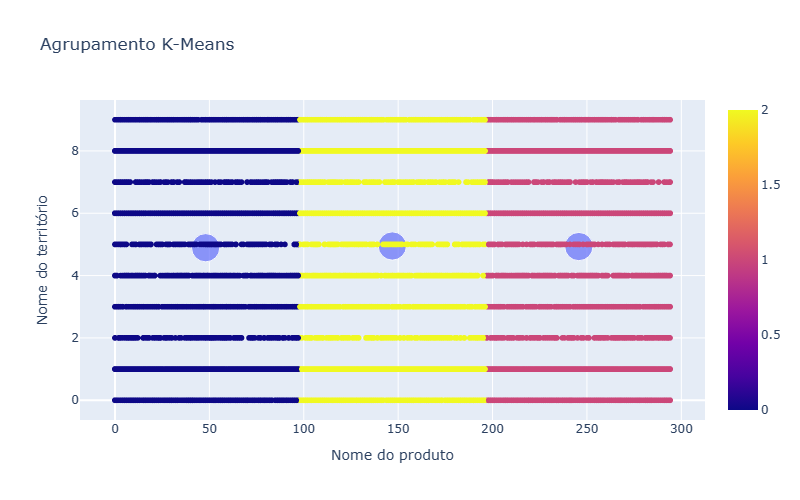


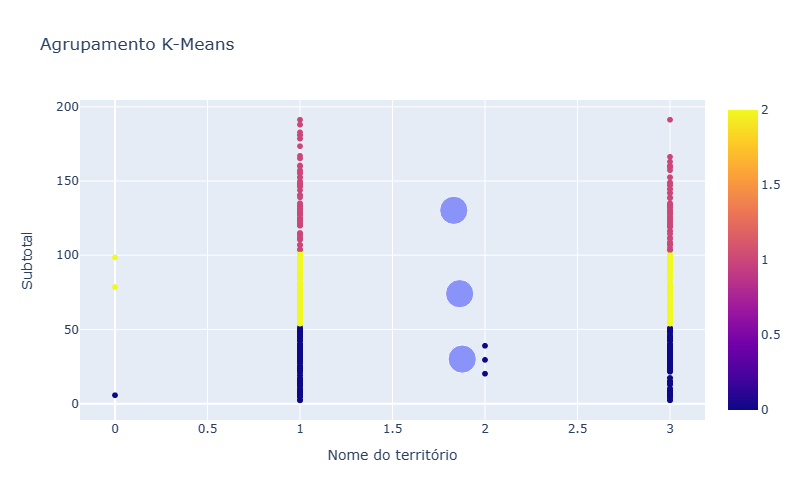





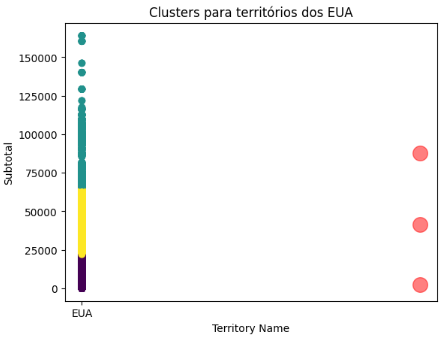